<a href="https://colab.research.google.com/github/Saurabhganvir/Book-Review-System/blob/main/02Imposter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving fake-or-real-the-impostor-hunt.zip to fake-or-real-the-impostor-hunt.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("fake-or-real-the-impostor-hunt.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Verify extraction
print("Extracted files:", os.listdir())


Extracted files: ['.config', 'data', 'fake-or-real-the-impostor-hunt.zip', 'sample_data']


In [3]:
import pandas as pd

train_csv_path = "./data/train.csv"
train_df = pd.read_csv(train_csv_path)

train_df.head()


,id,real_text_id
0,0,1
1,1,2
2,2,1
3,3,2
4,4,2


In [37]:
import glob

def load_articles(data_type="train"):
    base_path = f"./data/{data_type}/"
    articles = []

    # Get all article folders
    article_folders = sorted(glob.glob(base_path + "article_*"))

    for folder in article_folders:
        folder_name = os.path.basename(folder)

        file_1_path = os.path.join(folder, "file_1.txt")
        file_2_path = os.path.join(folder, "file_2.txt")

        # Read file contents
        with open(file_1_path, 'r', encoding='utf-8') as f1:
            file_1_text = f1.read()
        with open(file_2_path, 'r', encoding='utf-8') as f2:
            file_2_text = f2.read()

        # Append to list
        articles.append({
            "article_id": folder_name,
            "file_1_text": file_1_text,
            "file_2_text": file_2_text
        })

    return pd.DataFrame(articles)

# Load both train and test datasets
train_articles_df = load_articles("train")
test_articles_df = load_articles("test")

# Example usage
print("Train Articles:")
display(train_articles_df.head())

print("\nTest Articles:")
display(test_articles_df.head())


Train Articles:


,article_id,file_1_text,file_2_text
0,article_0000,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...
1,article_0001,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...
2,article_0002,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...
3,article_0003,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...
4,article_0004,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...



Test Articles:


,article_id,file_1_text,file_2_text
0,article_0000,"""Music"" Music music music Music music Music mu...",Since its launch on Paranal observatory's Very...
1,article_0001,underground exploration on SN's birth has prov...,SN 1987A provides valuable insights as newer o...
2,article_0002,This research aimed to understand how star sha...,ChromeDriver music player\nThis study focused ...
3,article_0003,Using OmegaCAM's wide field capabilities spann...,"greek translation :\nvazhi (megaCAM), territor..."
4,article_0004,AssemblyCulture AssemblyCulture AssemblyCultur...,XClass is software tool that helps astronomers...


In [38]:
# Merge based on index
merged_df = pd.concat([train_df, train_articles_df], axis=1)

# Remove the 'article_id' column as it is redundant after merging
merged_df = merged_df.drop(columns=['article_id'])

# Rename columns
merged_df = merged_df.rename(columns={
    'file_1_text': 'f1',
    'file_2_text': 'f2',
    'real_text_id': 'real_id'
})

# Show the merged dataframe
display(merged_df.head())

,id,real_id,f1,f2
0,0,1,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...
1,1,2,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...
2,2,1,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...
3,3,2,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...
4,4,2,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...


In [40]:
# Merge ground truth with train pairs
df = merged_df.merge(train_df, on="id")

# Reshape into long format: one row per text
df_long = []

for _, row in df.iterrows():
    # file_1
    df_long.append({
        "id": row["id"],
        "text": row["f1"],
        "label": 1 if row["real_id"] == 1 else 0
    })
    # file_2
    df_long.append({
        "id": row["id"],
        "text": row["f2"],
        "label": 1 if row["real_id"] == 2 else 0
    })

df_long = pd.DataFrame(df_long)


df_long.head()


,id,text,label
0,0,The VIRSA (Visible Infrared Survey Telescope A...,1
1,0,The China relay network has released a signifi...,0
2,1,China\nThe goal of this project involves achie...,0
3,1,The project aims to achieve an accuracy level ...,1
4,2,Scientists can learn about how galaxies form a...,1


In [52]:
import pandas as pd
import nltk
import numpy as np

# Download required tokenizer data
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab as suggested by the error

from nltk.tokenize import word_tokenize, sent_tokenize

# Functions to extract features
def char_count(text):
    return len(text)

def word_count(text):
    return len(word_tokenize(text))

def sentence_count(text):
    return len(sent_tokenize(text))

def avg_words_per_sentence(text):
    s_count = sentence_count(text)
    if s_count == 0:
        return 0
    return word_count(text) / s_count

# Apply functions to the dataframe
df_long["char_count"] = df_long["text"].apply(char_count)
df_long["word_count"] = df_long["text"].apply(word_count)
df_long["sentence_count"] = df_long["text"].apply(sentence_count)
df_long["avg_words_per_sentence"] = df_long["text"].apply(avg_words_per_sentence)

# Show the updated dataframe
df_long.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,id,text,label,char_count,word_count,sentence_count,avg_words_per_sentence
0,0,The VIRSA (Visible Infrared Survey Telescope A...,1,2196,322,9,35.777778
1,0,The China relay network has released a signifi...,0,2018,323,10,32.300000
2,1,China\nThe goal of this project involves achie...,0,3124,497,8,62.125000
3,1,The project aims to achieve an accuracy level ...,1,936,153,4,38.250000
4,2,Scientists can learn about how galaxies form a...,1,1139,171,3,57.000000


In [53]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_long["stopword_count"] = df_long["text"].apply(lambda x: sum(1 for word in word_tokenize(x.lower()) if word in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
df_long.head()

,id,text,label,char_count,word_count,sentence_count,avg_words_per_sentence,stopword_count
0,0,The VIRSA (Visible Infrared Survey Telescope A...,1,2196,322,9,35.777778,60
1,0,The China relay network has released a signifi...,0,2018,323,10,32.300000,85
2,1,China\nThe goal of this project involves achie...,0,3124,497,8,62.125000,151
3,1,The project aims to achieve an accuracy level ...,1,936,153,4,38.250000,38
4,2,Scientists can learn about how galaxies form a...,1,1139,171,3,57.000000,47


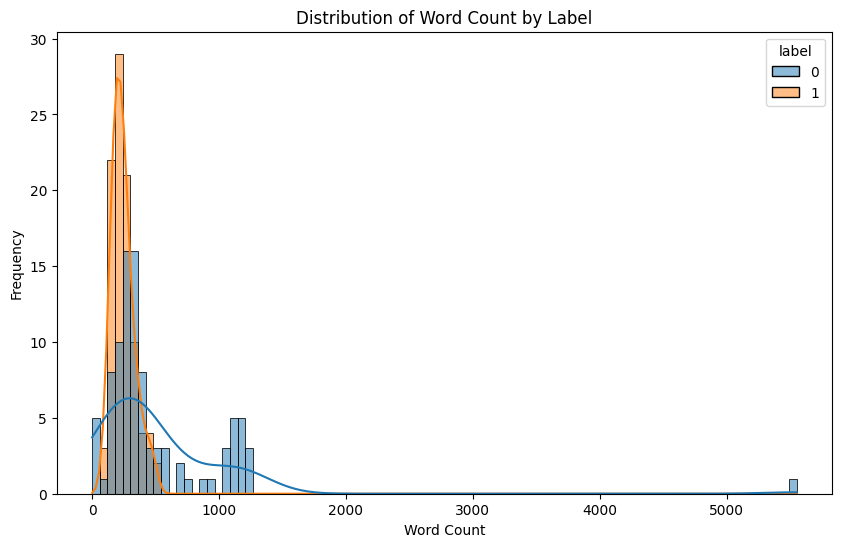

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of word count for each label
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long, x="word_count", hue="label", kde=True)
plt.title("Distribution of Word Count by Label")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

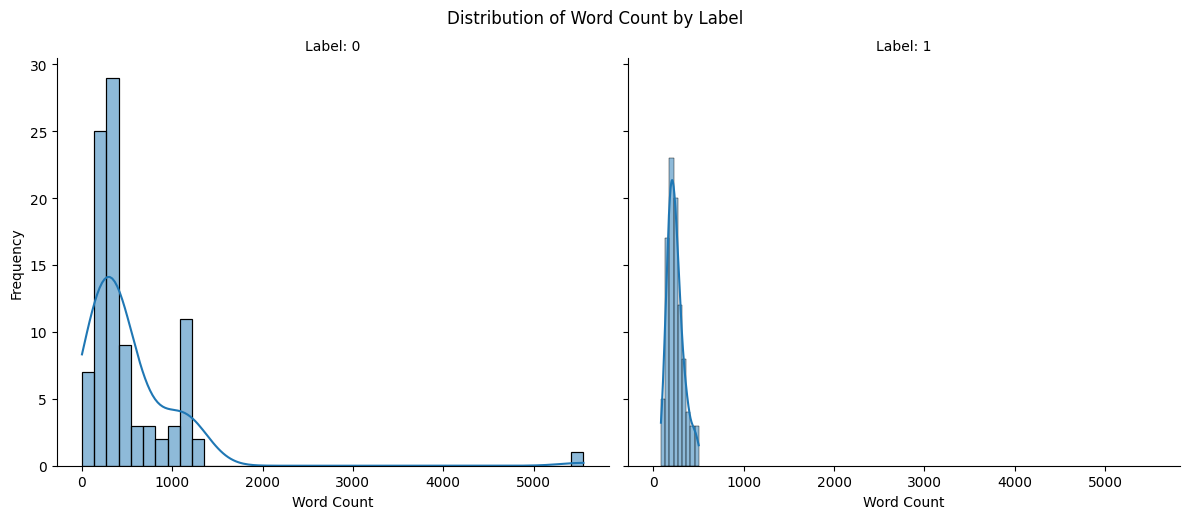

In [59]:
# Plot separate histograms of word count for each label
g = sns.FacetGrid(df_long, col="label", height=5, aspect=1.2)
g.map(sns.histplot, "word_count", kde=True)
g.fig.suptitle("Distribution of Word Count by Label", y=1.03)
g.set_axis_labels("Word Count", "Frequency")
g.set_titles("Label: {col_name}")
plt.show()

Text(0, 0.5, 'Frequency')

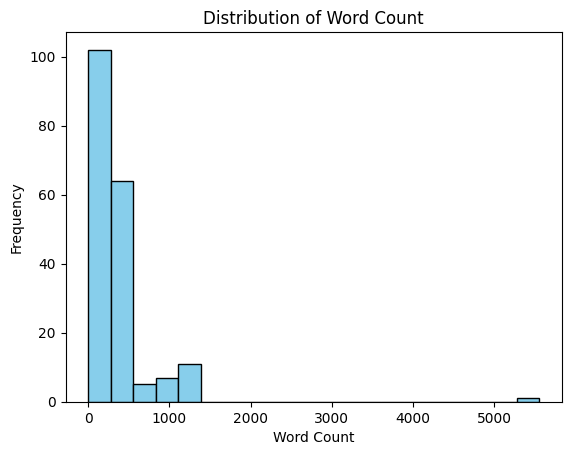

In [60]:
plt.hist(df_long["word_count"], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

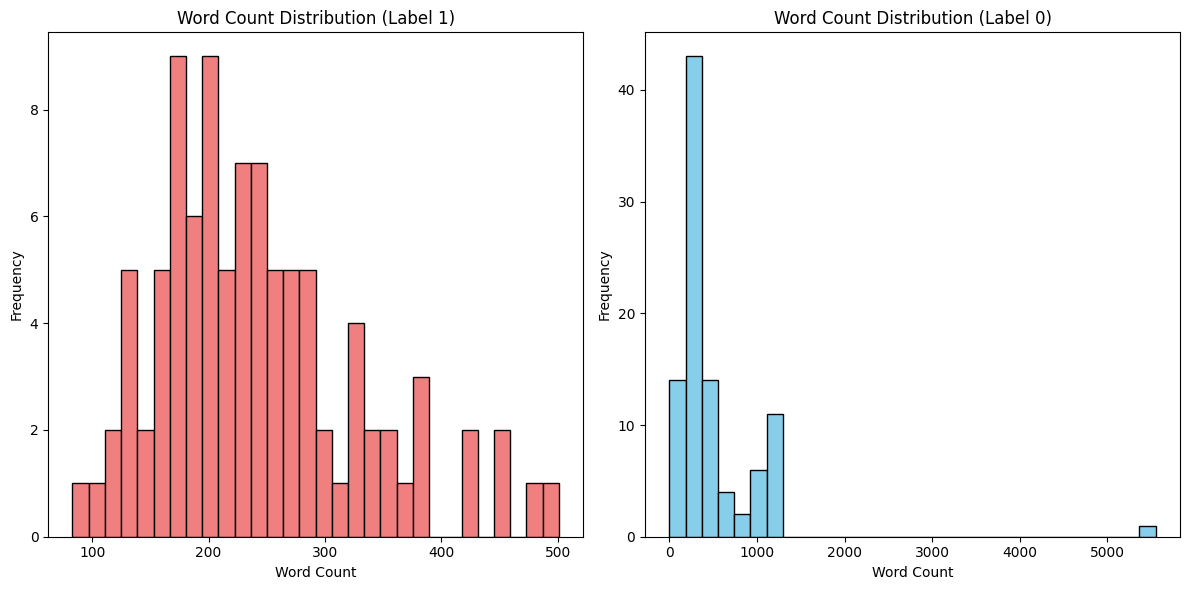

In [63]:
import matplotlib.pyplot as plt

# Filter data for each label
word_counts_label_0 = df_long[df_long['label'] == 0]['word_count']
word_counts_label_1 = df_long[df_long['label'] == 1]['word_count']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2) # 1 row, 2 columns, 1st plot
plt.hist(word_counts_label_0, bins=30, color='skyblue', edgecolor='black')
plt.title('Word Count Distribution (Label 0)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1) # 1 row, 2 columns, 2nd plot
plt.hist(word_counts_label_1, bins=30, color='lightcoral', edgecolor='black')
plt.title('Word Count Distribution (Label 1)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [64]:
df_long.columns

Index(['id', 'text', 'label', 'char_count', 'word_count', 'sentence_count',
       'avg_words_per_sentence', 'stopword_count'],
      dtype='object')

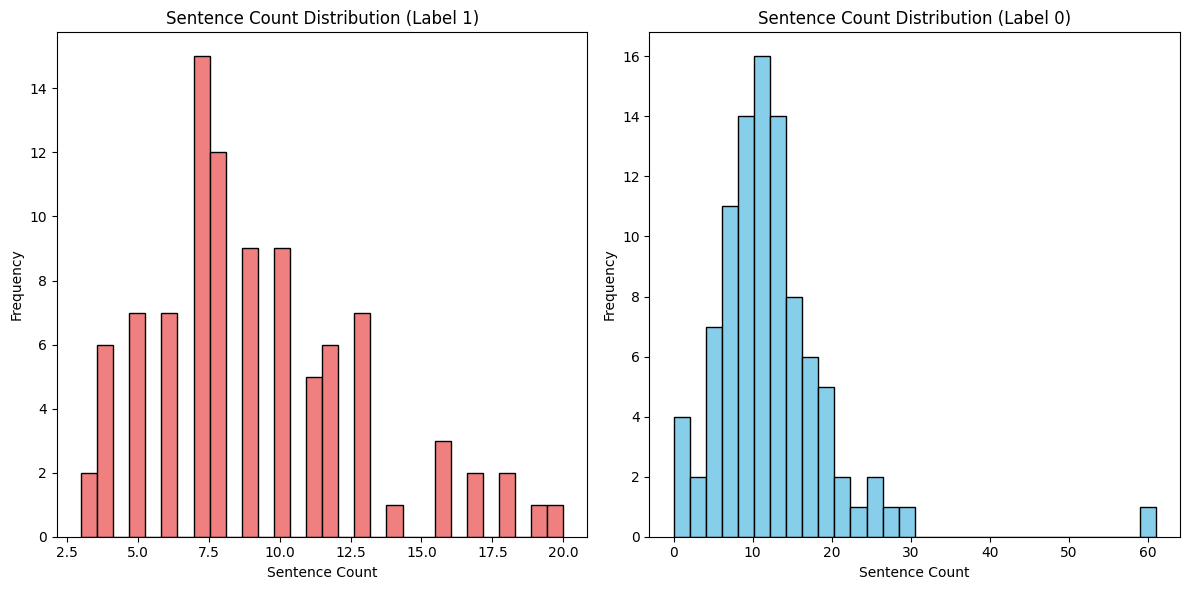

In [66]:
# Filter data for each label
sentence_label_0 = df_long[df_long['label'] == 0]['sentence_count']
sentence_label_1 = df_long[df_long['label'] == 1]['sentence_count']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2) # 1 row, 2 columns, 1st plot
plt.hist(sentence_label_0, bins=30, color='skyblue', edgecolor='black')
plt.title('Sentence Count Distribution (Label 0)')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1) # 1 row, 2 columns, 2nd plot
plt.hist(sentence_label_1, bins=30, color='lightcoral', edgecolor='black')
plt.title('Sentence Count Distribution (Label 1)')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

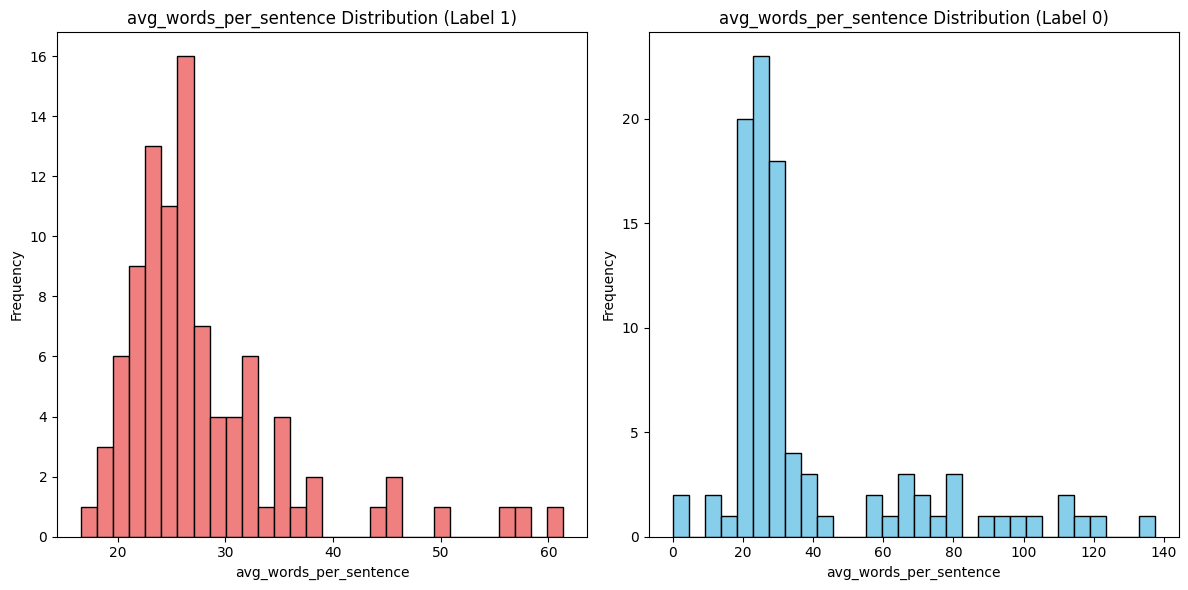

In [67]:
# Filter data for each label
sentence_label_0 = df_long[df_long['label'] == 0]['avg_words_per_sentence']
sentence_label_1 = df_long[df_long['label'] == 1]['avg_words_per_sentence']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2) # 1 row, 2 columns, 1st plot
plt.hist(sentence_label_0, bins=30, color='skyblue', edgecolor='black')
plt.title('avg_words_per_sentence Distribution (Label 0)')
plt.xlabel('avg_words_per_sentence')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1) # 1 row, 2 columns, 2nd plot
plt.hist(sentence_label_1, bins=30, color='lightcoral', edgecolor='black')
plt.title('avg_words_per_sentence Distribution (Label 1)')
plt.xlabel('avg_words_per_sentence')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

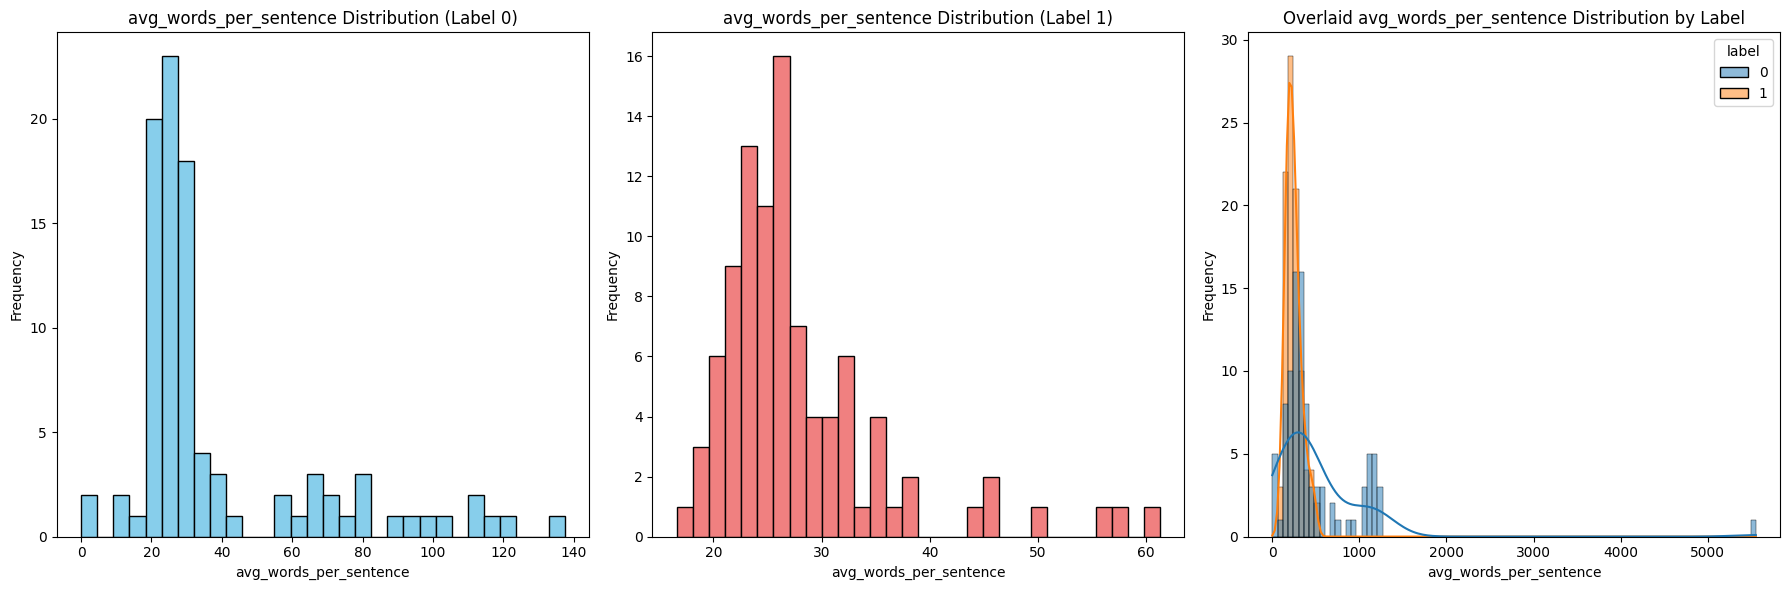

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each label
word_counts_label_0 = df_long[df_long['label'] == 0]['avg_words_per_sentence']
word_counts_label_1 = df_long[df_long['label'] == 1]['avg_words_per_sentence']

# Plot histograms with an overlaid plot
plt.figure(figsize=(18, 6))

# Subplot for Label 0
plt.subplot(1, 3, 1)
plt.hist(word_counts_label_0, bins=30, color='skyblue', edgecolor='black')
plt.title('avg_words_per_sentence Distribution (Label 0)')
plt.xlabel('avg_words_per_sentence')
plt.ylabel('Frequency')

# Subplot for Label 1
plt.subplot(1, 3, 2)
plt.hist(word_counts_label_1, bins=30, color='lightcoral', edgecolor='black')
plt.title('avg_words_per_sentence Distribution (Label 1)')
plt.xlabel('avg_words_per_sentence')
plt.ylabel('Frequency')

# Subplot with overlaid data
plt.subplot(1, 3, 3)
sns.histplot(data=df_long, x="word_count", hue="label", kde=True, common_norm=False)
plt.title("Overlaid avg_words_per_sentence Distribution by Label")
plt.xlabel("avg_words_per_sentence")
plt.ylabel("Frequency")

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [71]:
df_long.columns

Index(['id', 'text', 'label', 'char_count', 'word_count', 'sentence_count',
       'avg_words_per_sentence', 'stopword_count'],
      dtype='object')

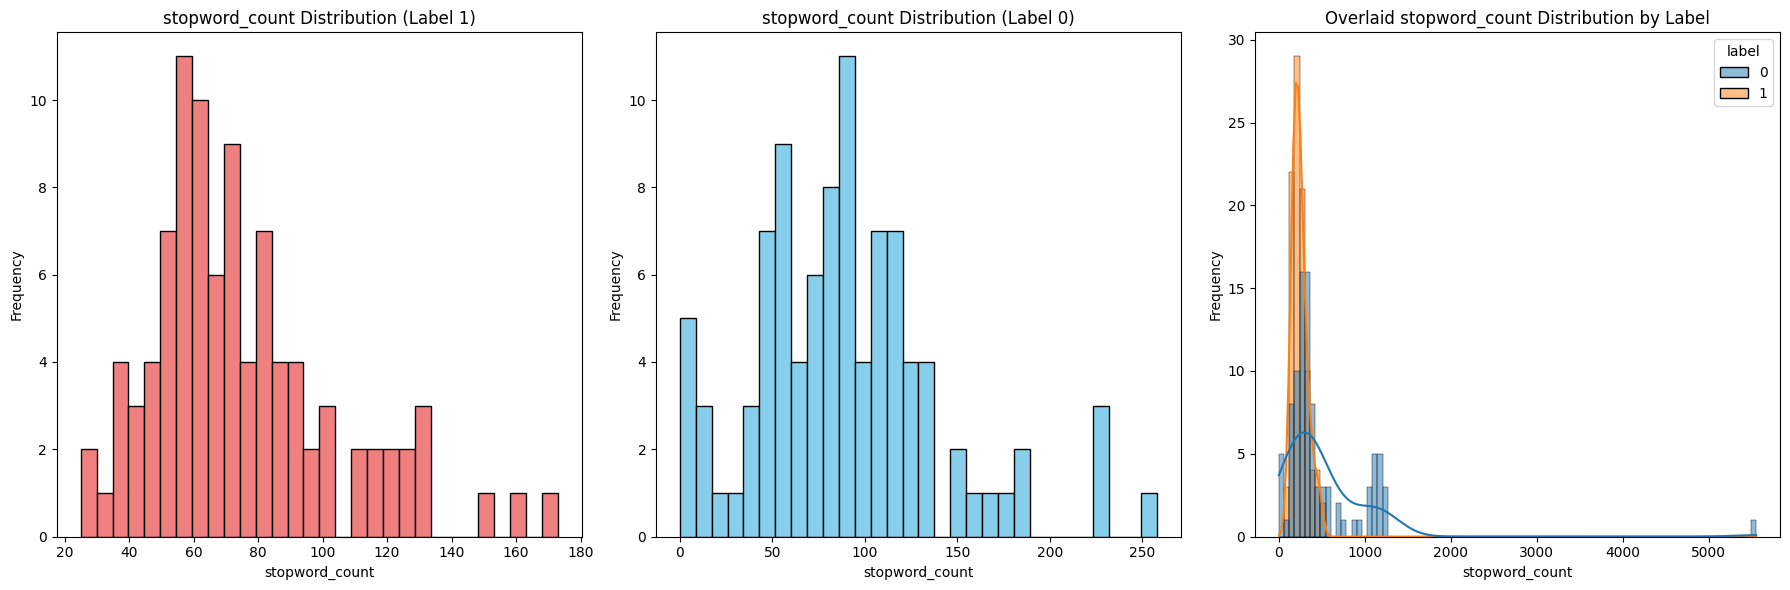

In [75]:
# Filter data for each label
word_counts_label_0 = df_long[df_long['label'] == 0]['stopword_count']
word_counts_label_1 = df_long[df_long['label'] == 1]['stopword_count']

# Plot histograms with an overlaid plot
plt.figure(figsize=(18, 6))

# Subplot for Label 0
plt.subplot(1, 3, 2)
plt.hist(word_counts_label_0, bins=30, color='skyblue', edgecolor='black')
plt.title('stopword_count Distribution (Label 0)')
plt.xlabel('stopword_count')
plt.ylabel('Frequency')

# Subplot for Label 1
plt.subplot(1, 3, 1)
plt.hist(word_counts_label_1, bins=30, color='lightcoral', edgecolor='black')
plt.title('stopword_count Distribution (Label 1)')
plt.xlabel('stopword_count')
plt.ylabel('Frequency')

# Subplot with overlaid data
plt.subplot(1, 3, 3)
sns.histplot(data=df_long, x="word_count", hue="label", kde=True, common_norm=False)
plt.title("Overlaid stopword_count Distribution by Label")
plt.xlabel("stopword_count")
plt.ylabel("Frequency")

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [76]:
!pip install textblob

In [77]:
import string
from textblob import TextBlob

# Sentiment score using TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Number count: count of numeric characters
def count_numbers(text):
    return sum(1 for char in text if char.isdigit())

# Special character count
special_chars = set("!@#$%^&*()_+-=[]{}|;:'\",.<>/?")

def count_special_chars(text):
    return sum(1 for char in text if char in special_chars)

# Punctuation count using string.punctuation
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)


In [78]:
# Sentiment features
df_long["polarity"] = df_long["text"].apply(get_polarity)
df_long["subjectivity"] = df_long["text"].apply(get_subjectivity)

# Number count
df_long["number_count"] = df_long["text"].apply(count_numbers)

# Special character count
df_long["special_char_count"] = df_long["text"].apply(count_special_chars)

# Punctuation count
df_long["punctuation_count"] = df_long["text"].apply(count_punctuation)

# Preview the results
df_long.head()


,id,text,label,char_count,word_count,sentence_count,avg_words_per_sentence,stopword_count,polarity,subjectivity,number_count,special_char_count,punctuation_count
0,0,The VIRSA (Visible Infrared Survey Telescope A...,1,2196,322,9,35.777778,60,0.125329,0.327682,0,32,32
1,0,The China relay network has released a signifi...,0,2018,323,10,32.300000,85,0.075320,0.479837,0,33,33
2,1,China\nThe goal of this project involves achie...,0,3124,497,8,62.125000,151,0.112578,0.471242,1,47,47
3,1,The project aims to achieve an accuracy level ...,1,936,153,4,38.250000,38,0.108161,0.419418,15,23,23
4,2,Scientists can learn about how galaxies form a...,1,1139,171,3,57.000000,47,0.113333,0.421250,0,16,16


In [79]:
df_long.columns

Index(['id', 'text', 'label', 'char_count', 'word_count', 'sentence_count',
       'avg_words_per_sentence', 'stopword_count', 'polarity', 'subjectivity',
       'number_count', 'special_char_count', 'punctuation_count'],
      dtype='object')

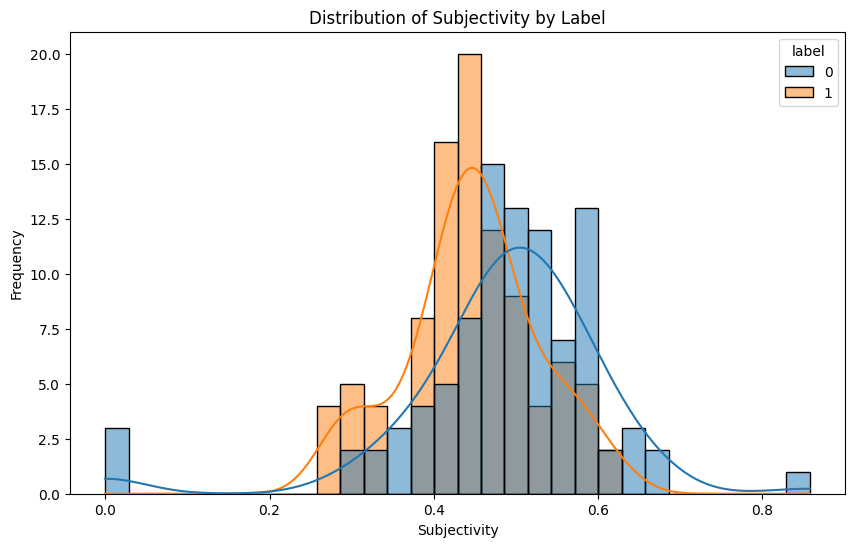

In [87]:
# Plot histograms of word count for each label
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long, x="subjectivity", hue="label", bins=30, kde=True)
plt.title("Distribution of Subjectivity by Label")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

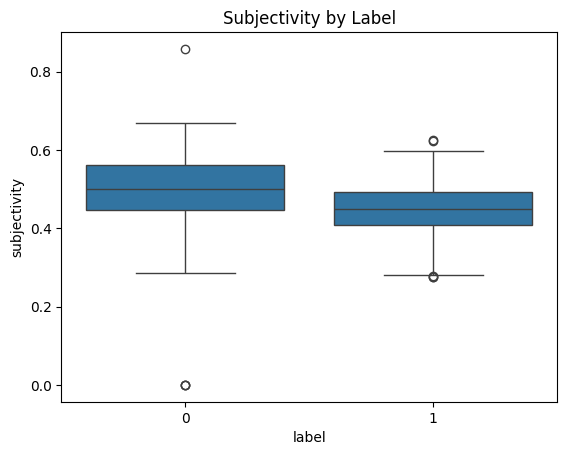

In [83]:
sns.boxplot(x="label", y="subjectivity", data=df_long)
plt.title("Subjectivity by Label")
plt.show()


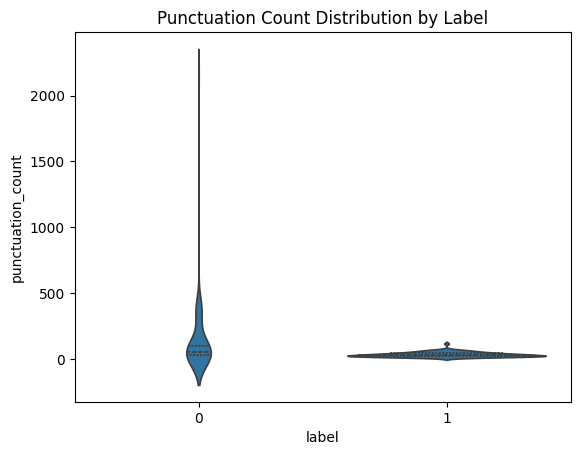

In [84]:
sns.violinplot(x="label", y="punctuation_count", data=df_long, inner="quartile")
plt.title("Punctuation Count Distribution by Label")
plt.show()


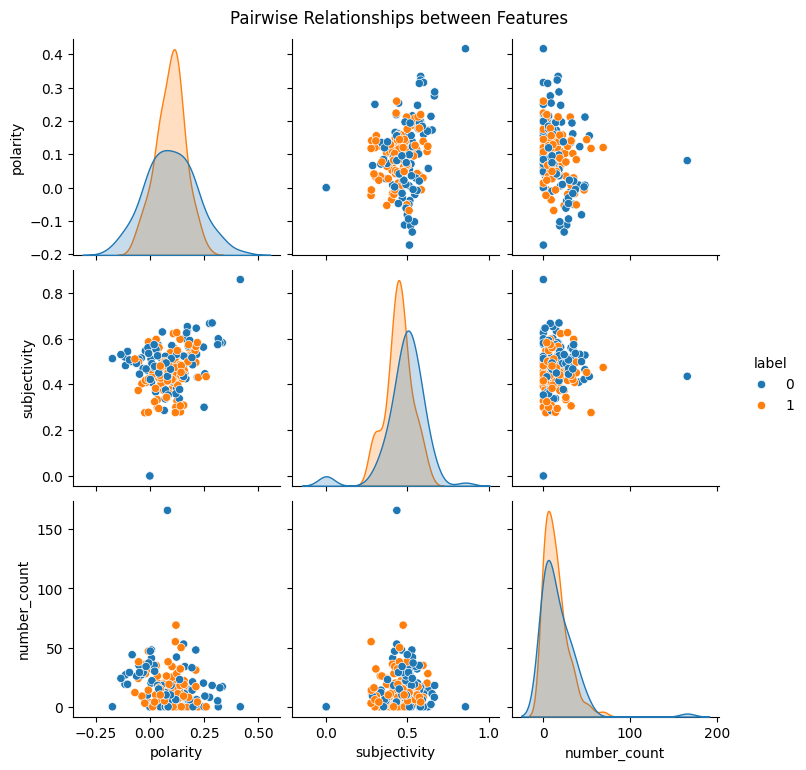

In [88]:
sns.pairplot(df_long, vars=["polarity", "subjectivity", "number_count"], hue="label", diag_kind="kde")
plt.suptitle("Pairwise Relationships between Features", y=1.02)
plt.show()


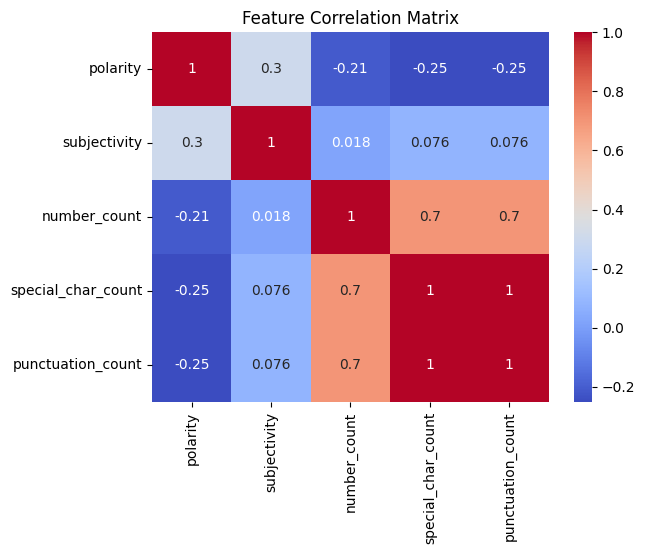

In [89]:
corr = df_long[["polarity", "subjectivity", "number_count", "special_char_count", "punctuation_count"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


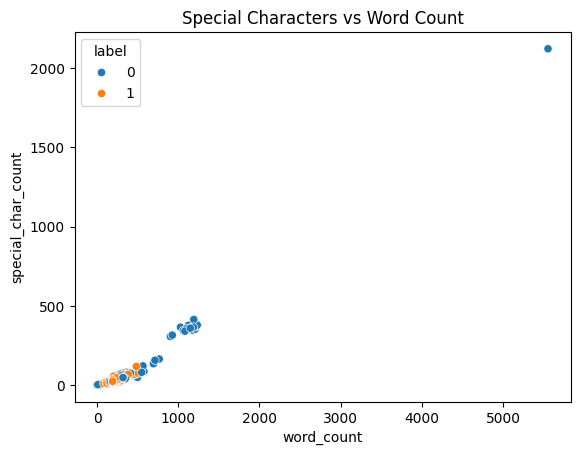

In [90]:
sns.scatterplot(x="word_count", y="special_char_count", hue="label", data=df_long)
plt.title("Special Characters vs Word Count")
plt.show()


Pre-processing the data

In [91]:
df_long["text"] = df_long["text"].str.lower()


In [93]:
#removing spaces
df_long["text"] = df_long["text"].str.strip().str.replace(r'\s+', ' ', regex=True)

In [94]:
# removing punctuations
df_long["clean_text"] = df_long["text"].str.translate(str.maketrans('', '', string.punctuation))


In [95]:
# removong stopwords
stop_words = set(stopwords.words('english'))
df_long["clean_text"] = df_long["text"].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

In [96]:
df_long.isnull().sum()


,0
id,0
text,0
label,0
char_count,0
word_count,0
sentence_count,0
avg_words_per_sentence,0
stopword_count,0
polarity,0
subjectivity,0


In [97]:
df_long.head()

,id,text,label,char_count,word_count,sentence_count,avg_words_per_sentence,stopword_count,polarity,subjectivity,number_count,special_char_count,punctuation_count,clean_text
0,0,the virsa (visible infrared survey telescope a...,1,2196,322,9,35.777778,60,0.125329,0.327682,0,32,32,virsa ( visible infrared survey telescope arra...
1,0,the china relay network has released a signifi...,0,2018,323,10,32.300000,85,0.075320,0.479837,0,33,33,china relay network released significant amoun...
2,1,china the goal of this project involves achiev...,0,3124,497,8,62.125000,151,0.112578,0.471242,1,47,47,china goal project involves achieving accuracy...
3,1,the project aims to achieve an accuracy level ...,1,936,153,4,38.250000,38,0.108161,0.419418,15,23,23,project aims achieve accuracy level 0.05 dex a...
4,2,scientists can learn about how galaxies form a...,1,1139,171,3,57.000000,47,0.113333,0.421250,0,16,16,scientists learn galaxies form evolve two meth...
